In [2]:
# import libraries
import pandas as pd
import numpy as np

import nltk
from nltk.tokenize import word_tokenize

import re

import matplotlib.pyplot as plt
%matplotlib inline

import math

import warnings
warnings.filterwarnings('ignore')

In [85]:
listings = pd.read_csv('listings_unitedstates_cleaned.csv')

In [86]:
listings['Clean_Description'] = listings['Description'].str.replace('[^\w\s]','')


In [87]:
listings['Clean_Description'] = listings['Clean_Description'].str.lower()

In [88]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [89]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [90]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [91]:
en_stopwords = stopwords.words('english')

In [92]:
def remove_stopwords(s):
    global en_stopwords
    s = word_tokenize(s)
    s = " ".join([w for w in s if w not in en_stopwords])
    return s

In [93]:
listings['Clean_Description'] = listings['Clean_Description'].map(remove_stopwords)


In [98]:
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()

# prepare corpus from the descriptions that dont have stopwords
corpus = " ".join(listings['Clean_Description'].tolist())

#tokenize words
tokenized_corpus = nltk.word_tokenize(corpus)

# lemmatize these tokens
lemmatized_tokens = [lmtzr.lemmatize(token) for token in tokenized_corpus]

# word frequencies for the lemmatized tokens
fd = nltk.FreqDist(lemmatized_tokens)

# get the top words
top_words = []
for key, value in fd.items():
    top_words.append((key, value))

# sort the list by the top frequencies
top_words = sorted(top_words, key = lambda x:x[1], reverse = True)

# keep top 10 words only




In [103]:
top_words_100 = top_words[:100]

In [111]:
top_words_10 = top_words[:10]

In [114]:
top_words_20 = top_words[:20]

In [115]:
from pandas import DataFrame
df = DataFrame(top_words_20,columns=['word','count'])

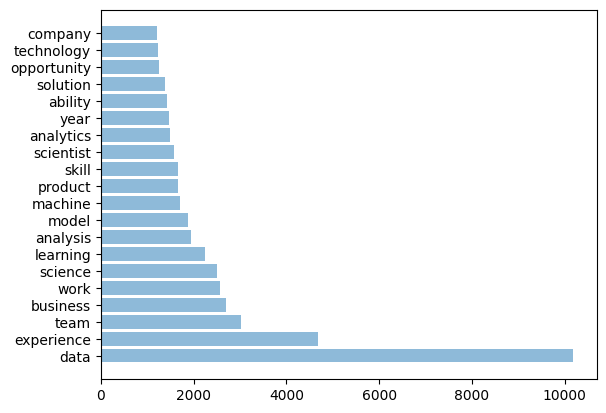

In [116]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt



plt.barh(df['word'], df['count'], align='center', alpha=0.5)



plt.show()